In [1]:
from fastfiz import fastfiz as FastFiz
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import itertools
%matplotlib inline

def get_ball_positions(table_state):
    balls = []
    for i in range(0,15):
        b = tb.getBall(i)
        if b.isInPlay():
            pos = b.getPos()
            balls.append((i, (pos.x, pos.y)))
    return balls

def render_balls(table_state, scale=300, output_filename='positions.png'):
    table = table_state.getTable()
    ball_infos = get_ball_positions(table_state)
    ball_colors = {0:(255, 255, 255), 1:(255, 255, 0), 2:(0, 0, 255), 3:(255, 0, 0), 4:(255, 0, 255), 5:(255, 150, 0), 6:(10, 200, 40), 7:(150, 150, 150), 8:(10, 10, 10), 9:(180, 180, 10)}
    
    bg_color=(6,63,128)
    ball_radius=int(table_state.getBall(0).getRadius()*scale)
    
    img_height, img_width, margin = (int(scale*table.TABLE_WIDTH), int(scale*table.TABLE_LENGTH), int(scale*0.04)) 
    img = np.zeros((img_width + 2*margin, img_height + 2*margin, 3), np.uint8)
    for x in range(margin, img_width + margin):
        for y in range(margin, img_height + margin):
            img[x, y, :] = bg_color[:]
    for b_id, b_pos in ball_infos:
        cv2.circle(img, tuple(map(lambda x, y: x + y, (int(b_pos[0]*scale),int(b_pos[1]*scale)), (margin, margin))), ball_radius, ball_colors[b_id], -1)

    plt.figure(figsize=(img_width/40,img_height/40))
    plt.imshow(img)
    plt.show()
    
def newTable(balls=[(0,(0.5,0.5))]):
    tb = FastFiz.TableState()
    for b in balls:
        if b[1][0]>0.0 and b[1][1]>0.0:
            tb.setBall(b[0], FastFiz.Ball.STATIONARY, FastFiz.Point(b[1][0],b[1][1]))
    return tb

In [2]:
ballString = "0.5,0.5 0.25,0.2 0.12,0.06 0.34,0.87 1.0,1.1 0.0,0.0 0.0,0.0 0.0,0.0 0.0,0.0 0.0,0.0"
balls = [(i, (float(p.split(',')[0]), float(p.split(',')[1]))) for i, p in enumerate(ballString.split(" "))]

In [3]:
tb = newTable(balls=balls)

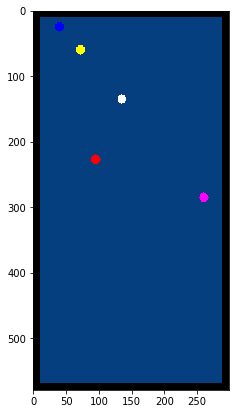

In [4]:
render_balls(tb, scale=250)

In [5]:
tb.getBall(2).isInPlay()

True

In [6]:
shotParams = FastFiz.ShotParams()
shotParams.v = 1.0
shotParams.a = 6
shotParams.b = 8
shotParams.phi = 230
shotParams.theta = 11

In [7]:
tb.executeShot(shotParams)

<fastfiz.fastfiz.Shot; proxy of <Swig Object of type 'Pool::Shot *' at 0x106572e10> >

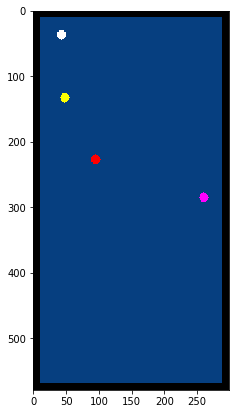

In [8]:
render_balls(tb, scale=250)

In [9]:
tb.getBall(2).isInPlay()

False